<a href="https://colab.research.google.com/github/AtomZa/OptizySimulation/blob/main/smf%26mmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import jv # Bessel function of the first kind
from scipy.special import kv # Modified Bessel function of the second kind
from scipy.special import kve # Exponentially scaled modified Bessel function of the second kind
from scipy.optimize import root_scalar # Root finding algorithm
import math

# Optical Parameters

In [261]:
ncoresmf = 1.4504;
ncladdingsmf = 1.447;
asmf = 4.1;
ncoremmf = 1.443;
nmedium = 1.04641231840654;
ncladdingmmf = nmedium;
ammf = 62.5;
zmmf = 57713;
epscoresmf = math.pow(ncoresmf, 2);
epscladdingsmf = math.pow(ncladdingsmf, 2);
epscoremmf = math.pow(ncoremmf, 2);
epscladdingmmf = math.pow(ncladdingmmf, 2);
lamb = 0.3;
k0 = 2*math.pi/lamb;
aair = 72.5;
dx = 0.0001;
ifinal = ((ncoresmf - ncladdingsmf)/dx);

# Find Effective Index

In [262]:
def characeqnsmf(neff,epscoresmf,epscladdingsmf,k0,asmf):
    return ((jv(0,k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2))))*(k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf))*(kv(1,k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf)))) - ((kv(0,k0*asmf*math.sqrt(math.pow(neff,2) - epscladdingsmf)))*(k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2)))*(jv(1,k0*asmf*math.sqrt(epscoresmf - math.pow(neff,2)))));

In [263]:
neffarrsmf = 0;
for i in range(round(ifinal)):
  try:
    sol = root_scalar(characeqnsmf, args=(epscoresmf, epscladdingsmf, k0, asmf), method='toms748', bracket=[ncoresmf-((i+1)*dx), ncoresmf-(i*dx)])
    neffarrsmf = sol.root
    break
  except:
    pass

# Singlemode

In [264]:
usmf =  k0*asmf*math.sqrt(math.pow(ncoresmf,2) - math.pow(neffarrsmf,2));   
wsmf =  k0*asmf*math.sqrt(math.pow(neffarrsmf,2) - math.pow(ncladdingsmf,2));

In [265]:
rarrsmf = np.arange(-asmf, asmf, 0.01);
rarrcladding1 = np.arange(-ammf, -asmf-0.01, 0.01);
rarrcladding2 = np.arange(asmf+0.01, ammf, 0.01);
rarrair1 = np.arange(-aair, -ammf-0.01, 0.01);
rarrair2 = np.arange(ammf+0.01, aair, 0.01);
rarrall = np.concatenate((rarrair1, rarrcladding1, rarrsmf, rarrcladding2, rarrair2), axis=None)

In [266]:
ecoresmf = jv(0,(usmf*rarrsmf/asmf));
c = (jv(0,usmf))/(kv(0,wsmf));
ecladdingsmf2 = c*(kv(0,(wsmf*rarrcladding2/asmf)));
ecladdingsmf1 = np.zeros(np.size(ecladdingsmf2))
eair1 = np.zeros(np.size(rarrair1));
eair2 = np.zeros(np.size(rarrair2));
eall =  np.concatenate((eair1, ecladdingsmf1, ecoresmf, ecladdingsmf2, eair2), axis=None)

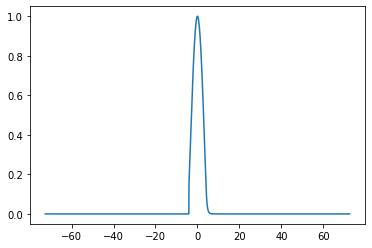

In [267]:
plt.plot(rarrall,eall)
plt.show()

# Multimode

In [268]:
ifinal = ((ncoremmf - ncladdingmmf)/dx);
neffarrmmf = np.zeros((1,round(ifinal))); 

In [269]:
def characeqnmmf(neff,epscoremmf,epscladdingmmf,k0,ammf):
    return ((jv(0,k0*ammf*math.sqrt(epscoremmf - math.pow(neff,2))))*(k0*ammf*math.sqrt(math.pow(neff,2) - epscladdingmmf))*(kve(1,k0*ammf*math.sqrt(math.pow(neff,2) - epscladdingmmf)))) - ((kve(0,k0*ammf*math.sqrt(math.pow(neff,2) - epscladdingmmf)))*(k0*ammf*math.sqrt(epscoremmf - math.pow(neff,2)))*(jv(1,k0*ammf*math.sqrt(epscoremmf - math.pow(neff,2)))));

In [270]:
for i in range(round(ifinal)):
  try:
    sol = root_scalar(characeqnmmf, args=(epscoremmf, epscladdingmmf, k0, ammf), method='toms748', bracket=[ncladdingmmf + (i*dx), ncladdingmmf + ((i+1)*dx)])
    neffarrmmf[0,i] = sol.root
  except:
    neffarrmmf[0,i] = np.nan
    pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [274]:
neffarrmmf= neffarrmmf[:, ~np.isnan(neffarrmmf).any(axis=0)]
neffarrmmf = np.flip(neffarrmmf, axis=None)
mmfmode = np.arange(0, np.size(neffarrmmf), 1)

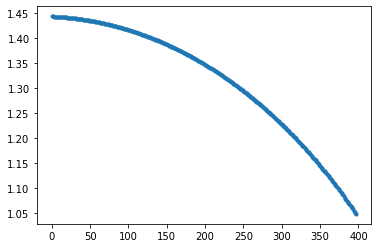

In [275]:
plt.plot(mmfmode, np.transpose(neffarrmmf), '.')
plt.show()